In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds1=pd.read_csv('Retail_datasets_P2/User_product_purchase_details_p2.csv')

In [4]:
ds1

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,C,2,0,20,NaN,NaN,365


In [5]:
ds2=pd.read_csv('Retail_datasets_P2/user_demographics.csv')

In [6]:
ds2

,User_ID,Gender,Age,Occupation
0,1000001,F,0-17,10
1,1000002,M,55+,16
2,1000003,M,26-35,15
3,1000004,M,46-50,7
4,1000005,M,26-35,20
...,...,...,...,...
5886,1004588,F,26-35,4
5887,1004871,M,18-25,12
5888,1004113,M,36-45,17
5889,1005391,M,26-35,7


In [7]:
ds=pd.merge(ds1,ds2,on='User_ID')

In [8]:
ds

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370,F,0-17,10
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200,F,0-17,10
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422,F,0-17,10
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057,F,0-17,10
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969,M,55+,16
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,B,1,1,20,NaN,NaN,368,M,51-55,13
550064,1006035,P00375436,C,3,0,20,NaN,NaN,371,F,26-35,1
550065,1006036,P00375436,B,4+,1,20,NaN,NaN,137,F,26-35,15
550066,1006038,P00375436,C,2,0,20,NaN,NaN,365,F,55+,1


In [9]:
ds.isna().sum()

User_ID                            0
Product_ID                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Gender                             0
Age                                0
Occupation                         0
dtype: int64

In [10]:
ds['Product_Category_1']=ds['Product_Category_1'].fillna(0)
ds['Product_Category_2']=ds['Product_Category_2'].fillna(0)
ds['Product_Category_3']=ds['Product_Category_3'].fillna(0)

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   City_Category               550068 non-null  object 
 3   Stay_In_Current_City_Years  550068 non-null  object 
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   Gender                      550068 non-null  object 
 10  Age                         550068 non-null  object 
 11  Occupation                  550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
ds[['Product_Category_2','Product_Category_3']]=ds[['Product_Category_2','Product_Category_3']].astype(int)

In [13]:
#spliting the age range into int(age)
ds['start']=ds['Age'].str.split('-').str[0]
ds['end']=ds['Age'].str.split('-').str[1]

#+ is present so replace
ds['start']=ds['start'].str.replace('+','',regex=False)

#for null val in end of range replace with start 
ds['end']=ds['end'].fillna(ds['start'])

#convert to int datatype
ds['start']=ds['start'].astype(int)
ds['end']=ds['end'].astype(int)

#finding median
ds['Age']=(ds['start']+ds['end'])/2
#drop the temp col
ds.drop(['start','end'],axis=1,inplace=True)
ds["Age"]=ds['Age'].astype(int)

In [14]:
ds['Purchase'].mean()

np.float64(9263.968712959126)

In [15]:
mean=ds['Purchase'].mean()
def voucher(purchase):
    if purchase > mean:
         dis=purchase*0.25
         return purchase-dis
         
    else:
        return purchase
ds['After_discount']=ds['Purchase'].apply(voucher)

In [16]:
ds

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation,After_discount
0,1000001,P00069042,A,2,0,3,0,0,8370,F,8,10,8370.0
1,1000001,P00248942,A,2,0,1,6,14,15200,F,8,10,11400.0
2,1000001,P00087842,A,2,0,12,0,0,1422,F,8,10,1422.0
3,1000001,P00085442,A,2,0,12,14,0,1057,F,8,10,1057.0
4,1000002,P00285442,C,4+,0,8,0,0,7969,M,55,16,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,B,1,1,20,0,0,368,M,53,13,368.0
550064,1006035,P00375436,C,3,0,20,0,0,371,F,30,1,371.0
550065,1006036,P00375436,B,4+,1,20,0,0,137,F,30,15,137.0
550066,1006038,P00375436,C,2,0,20,0,0,365,F,55,1,365.0


In [17]:
grp_ds=ds[['User_ID','Gender','Age','Occupation','Product_ID','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','Purchase','After_discount']].groupby('User_ID').sum()

In [18]:
grp_ds

,Gender,Age,Occupation,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,After_discount
User_ID,,,,,,,,,,,,
1000001,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,280,350,P00069042P00248942P00087842P00085442P00085942P...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,22222222222222222222222222222222222,0,213,132,148,334093,273151.00
1000002,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,4235,1232,P00285442P00112842P00293242P00289342P00303342P...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+...,0,354,539,359,810472,661163.00
1000003,MMMMMMMMMMMMMMMMMMMMMMMMMMMMM,870,435,P00193542P00132842P0098342P00010242P00128042P0...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAA,33333333333333333333333333333,0,93,117,148,341635,277406.00
1000004,MMMMMMMMMMMMMM,672,98,P00184942P00346142P0097242P00046742P00329542P0...,BBBBBBBBBBBBBB,22222222222222,14,33,102,127,206468,155933.50
1000005,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,3180,2120,P00274942P00251242P00014542P00031342P00145042P...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,1111111111111111111111111111111111111111111111...,106,659,642,207,821001,731065.50
...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,15420,7710,P00237642P00250342P00173242P00255342P00294442P...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB...,4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+...,514,3200,3403,1509,4116058,3643821.75
1006037,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,5856,122,P00067342P00111842P00323642P00177442P00087042P...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+4+...,0,938,894,456,1119538,950006.75
1006038,FFFFFFFFFFFF,660,12,P00034742P00251242P00086042P00109542P00113442P...,CCCCCCCCCCCC,222222222222,0,83,93,51,90034,80861.50


In [19]:
grp_ds.drop(['Age','Gender','City_Category','Stay_In_Current_City_Years','Marital_Status','Occupation'],axis=1,inplace=True)

In [20]:
grp_ds.reset_index()

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,After_discount
0,1000001,P00069042P00248942P00087842P00085442P00085942P...,213,132,148,334093,273151.00
1,1000002,P00285442P00112842P00293242P00289342P00303342P...,354,539,359,810472,661163.00
2,1000003,P00193542P00132842P0098342P00010242P00128042P0...,93,117,148,341635,277406.00
3,1000004,P00184942P00346142P0097242P00046742P00329542P0...,33,102,127,206468,155933.50
4,1000005,P00274942P00251242P00014542P00031342P00145042P...,659,642,207,821001,731065.50
...,...,...,...,...,...,...,...
5886,1006036,P00237642P00250342P00173242P00255342P00294442P...,3200,3403,1509,4116058,3643821.75
5887,1006037,P00067342P00111842P00323642P00177442P00087042P...,938,894,456,1119538,950006.75
5888,1006038,P00034742P00251242P00086042P00109542P00113442P...,83,93,51,90034,80861.50
5889,1006039,P00114042P00199442P00088542P00254242P00101042P...,439,580,324,590319,510367.00


In [21]:
remove_ds=ds[['User_ID','Age','Gender','City_Category','Stay_In_Current_City_Years','Marital_Status','Occupation']]

In [22]:
remove_ds

,User_ID,Age,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Occupation
0,1000001,8,F,A,2,0,10
1,1000001,8,F,A,2,0,10
2,1000001,8,F,A,2,0,10
3,1000001,8,F,A,2,0,10
4,1000002,55,M,C,4+,0,16
...,...,...,...,...,...,...,...
550063,1006033,53,M,B,1,1,13
550064,1006035,30,F,C,3,0,1
550065,1006036,30,F,B,4+,1,15
550066,1006038,55,F,C,2,0,1


In [23]:
remove_ds=remove_ds.drop_duplicates()

In [24]:
remove_ds['City_Category'].isna().sum()

np.int64(0)

In [25]:
type(grp_ds)

pandas.core.frame.DataFrame

In [26]:
type(remove_ds)

pandas.core.frame.DataFrame

In [27]:
#merging the duplicate cleaned ds and grouped ds
clean_ds=pd.merge(remove_ds,grp_ds,on='User_ID')

In [28]:
city_mapping = {'A': 0, 'B': 1, 'C': 2}
clean_ds['City_Category'] = clean_ds['City_Category'].map(city_mapping)
clean_ds['City_Category'] = clean_ds['City_Category'].astype('int')

In [29]:
clean_ds

,User_ID,Age,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Occupation,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,After_discount
0,1000001,8,F,0,2,0,10,P00069042P00248942P00087842P00085442P00085942P...,213,132,148,334093,273151.00
1,1000002,55,M,2,4+,0,16,P00285442P00112842P00293242P00289342P00303342P...,354,539,359,810472,661163.00
2,1000003,30,M,0,3,0,15,P00193542P00132842P0098342P00010242P00128042P0...,93,117,148,341635,277406.00
3,1000004,48,M,1,2,1,7,P00184942P00346142P0097242P00046742P00329542P0...,33,102,127,206468,155933.50
4,1000005,30,M,0,1,1,20,P00274942P00251242P00014542P00031342P00145042P...,659,642,207,821001,731065.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1004588,30,F,2,0,0,4,P00260042P00144242P00129542P00190242P00121642P...,114,125,20,140990,129841.00
5887,1004871,21,M,2,2,0,12,P00242742P00321942P00286642P00286742P00295942P...,66,83,40,108545,89135.00
5888,1004113,40,M,2,3,0,17,P00351842P00127642P00182342P00073842P00070442P...,79,119,90,213550,174646.75
5889,1005391,30,M,0,0,0,7,P00339342P00034642P00255842P00084842P00302042P...,40,36,16,60182,51062.50


In [30]:
clean_ds['Stay_In_Current_City_Years']=clean_ds['Stay_In_Current_City_Years'].str.replace('+','')

In [31]:
clean_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     5891 non-null   int64  
 1   Age                         5891 non-null   int64  
 2   Gender                      5891 non-null   object 
 3   City_Category               5891 non-null   int64  
 4   Stay_In_Current_City_Years  5891 non-null   object 
 5   Marital_Status              5891 non-null   int64  
 6   Occupation                  5891 non-null   int64  
 7   Product_ID                  5891 non-null   object 
 8   Product_Category_1          5891 non-null   int64  
 9   Product_Category_2          5891 non-null   int64  
 10  Product_Category_3          5891 non-null   int64  
 11  Purchase                    5891 non-null   int64  
 12  After_discount              5891 non-null   float64
dtypes: float64(1), int64(9), object(3

In [32]:
clean_ds

,User_ID,Age,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Occupation,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,After_discount
0,1000001,8,F,0,2,0,10,P00069042P00248942P00087842P00085442P00085942P...,213,132,148,334093,273151.00
1,1000002,55,M,2,4,0,16,P00285442P00112842P00293242P00289342P00303342P...,354,539,359,810472,661163.00
2,1000003,30,M,0,3,0,15,P00193542P00132842P0098342P00010242P00128042P0...,93,117,148,341635,277406.00
3,1000004,48,M,1,2,1,7,P00184942P00346142P0097242P00046742P00329542P0...,33,102,127,206468,155933.50
4,1000005,30,M,0,1,1,20,P00274942P00251242P00014542P00031342P00145042P...,659,642,207,821001,731065.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1004588,30,F,2,0,0,4,P00260042P00144242P00129542P00190242P00121642P...,114,125,20,140990,129841.00
5887,1004871,21,M,2,2,0,12,P00242742P00321942P00286642P00286742P00295942P...,66,83,40,108545,89135.00
5888,1004113,40,M,2,3,0,17,P00351842P00127642P00182342P00073842P00070442P...,79,119,90,213550,174646.75
5889,1005391,30,M,0,0,0,7,P00339342P00034642P00255842P00084842P00302042P...,40,36,16,60182,51062.50


In [33]:
clean_ds['Stay_In_Current_City_Years']=clean_ds['Stay_In_Current_City_Years'].astype(int)

In [34]:
clean_ds

,User_ID,Age,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Occupation,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,After_discount
0,1000001,8,F,0,2,0,10,P00069042P00248942P00087842P00085442P00085942P...,213,132,148,334093,273151.00
1,1000002,55,M,2,4,0,16,P00285442P00112842P00293242P00289342P00303342P...,354,539,359,810472,661163.00
2,1000003,30,M,0,3,0,15,P00193542P00132842P0098342P00010242P00128042P0...,93,117,148,341635,277406.00
3,1000004,48,M,1,2,1,7,P00184942P00346142P0097242P00046742P00329542P0...,33,102,127,206468,155933.50
4,1000005,30,M,0,1,1,20,P00274942P00251242P00014542P00031342P00145042P...,659,642,207,821001,731065.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1004588,30,F,2,0,0,4,P00260042P00144242P00129542P00190242P00121642P...,114,125,20,140990,129841.00
5887,1004871,21,M,2,2,0,12,P00242742P00321942P00286642P00286742P00295942P...,66,83,40,108545,89135.00
5888,1004113,40,M,2,3,0,17,P00351842P00127642P00182342P00073842P00070442P...,79,119,90,213550,174646.75
5889,1005391,30,M,0,0,0,7,P00339342P00034642P00255842P00084842P00302042P...,40,36,16,60182,51062.50


In [35]:
clean_ds.drop('Product_ID',axis=1,inplace=True)

In [36]:
# clean_ds.drop('City_Category',axis=1,inplace=True)

In [37]:
#eliminating the age which is less dhan 18
clean_ds = clean_ds[clean_ds['Age'] >= 18]

In [38]:
clean_ds

,User_ID,Age,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,After_discount
1,1000002,55,M,2,4,0,16,354,539,359,810472,661163.00
2,1000003,30,M,0,3,0,15,93,117,148,341635,277406.00
3,1000004,48,M,1,2,1,7,33,102,127,206468,155933.50
4,1000005,30,M,0,1,1,20,659,642,207,821001,731065.50
5,1000006,53,F,0,1,0,9,273,369,232,379930,320093.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1004588,30,F,2,0,0,4,114,125,20,140990,129841.00
5887,1004871,21,M,2,2,0,12,66,83,40,108545,89135.00
5888,1004113,40,M,2,3,0,17,79,119,90,213550,174646.75
5889,1005391,30,M,0,0,0,7,40,36,16,60182,51062.50


In [39]:
# clean_ds['voucher_to_category']=clean_ds[['Product_Category_1','Product_Category_2','Product_Category_3']].max(axis=1)

In [40]:
# clean_ds.drop('voucher_to_category',axis=1)

In [41]:
pd.options.mode.copy_on_write = True

In [42]:
# clean_ds.drop('voucher_to_category',axis=1,inplace=True)

In [43]:
clean_ds

,User_ID,Age,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,After_discount
1,1000002,55,M,2,4,0,16,354,539,359,810472,661163.00
2,1000003,30,M,0,3,0,15,93,117,148,341635,277406.00
3,1000004,48,M,1,2,1,7,33,102,127,206468,155933.50
4,1000005,30,M,0,1,1,20,659,642,207,821001,731065.50
5,1000006,53,F,0,1,0,9,273,369,232,379930,320093.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1004588,30,F,2,0,0,4,114,125,20,140990,129841.00
5887,1004871,21,M,2,2,0,12,66,83,40,108545,89135.00
5888,1004113,40,M,2,3,0,17,79,119,90,213550,174646.75
5889,1005391,30,M,0,0,0,7,40,36,16,60182,51062.50


VISUALIZATION

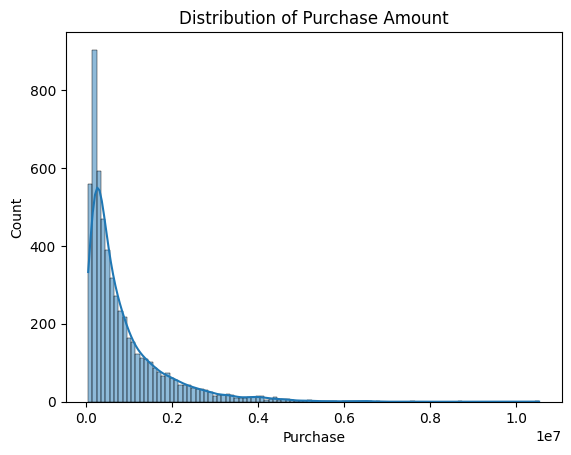

In [67]:
#univariate analyses
sns.histplot(clean_ds['Purchase'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.show()

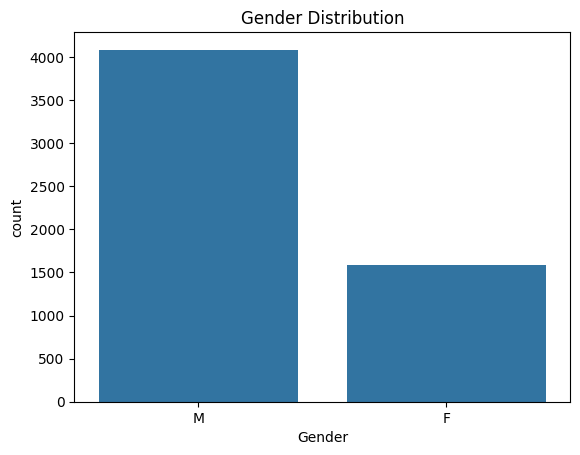

In [69]:
#gender distribution
sns.countplot(data=clean_ds, x='Gender')
plt.title('Gender Distribution')
plt.show()

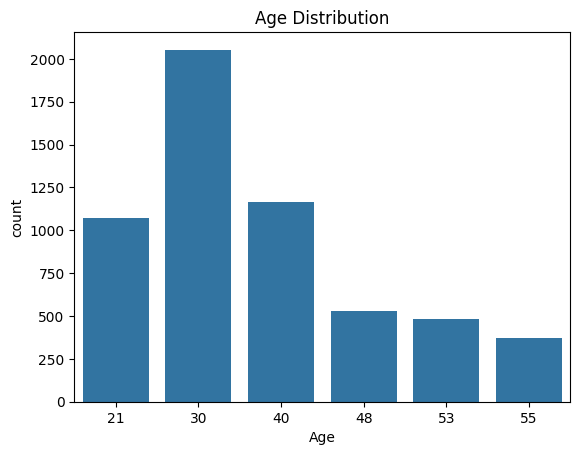

In [70]:
# Count plot for Age distribution
sns.countplot(data=clean_ds, x='Age')
plt.title('Age Distribution')
plt.show()

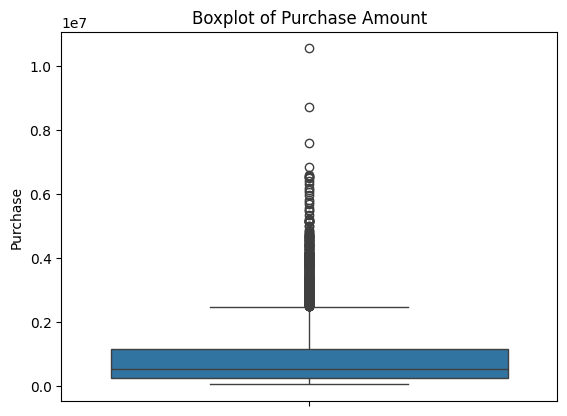

In [72]:
sns.boxplot(clean_ds['Purchase'])
plt.title('Boxplot of Purchase Amount')
plt.show()

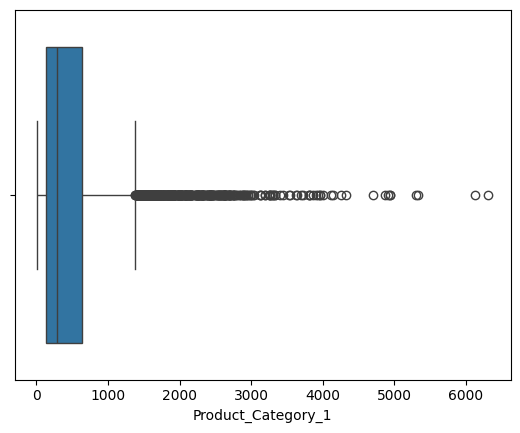

In [73]:
sns.boxplot(x=clean_ds['Product_Category_1'])
plt.show()

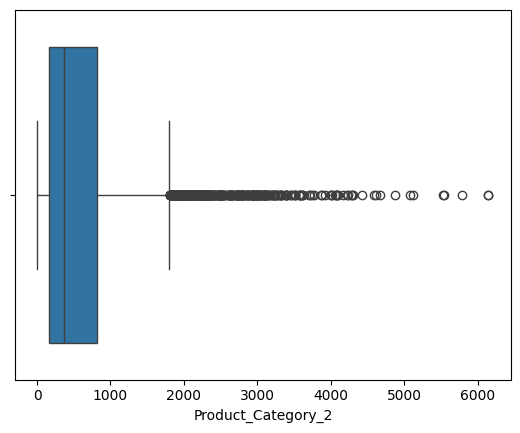

In [74]:
sns.boxplot(x=clean_ds['Product_Category_2'])
plt.show()

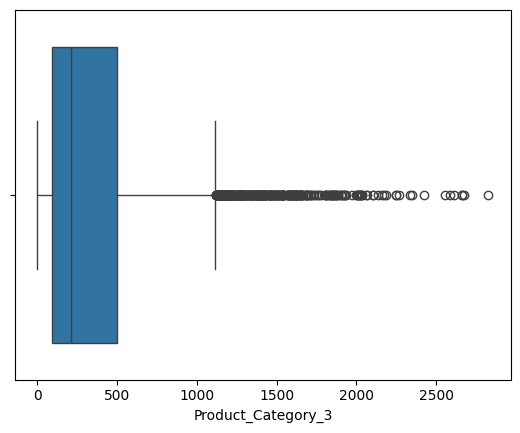

In [75]:
sns.boxplot(x=clean_ds['Product_Category_3'])
plt.show()

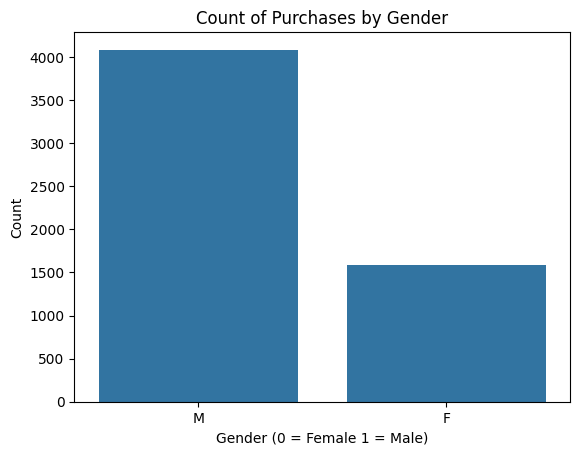

In [77]:
sns.countplot(data=clean_ds, x='Gender')
plt.title('Count of Purchases by Gender')
plt.xlabel('Gender (0 = Female 1 = Male)')
plt.ylabel('Count')
plt.show()

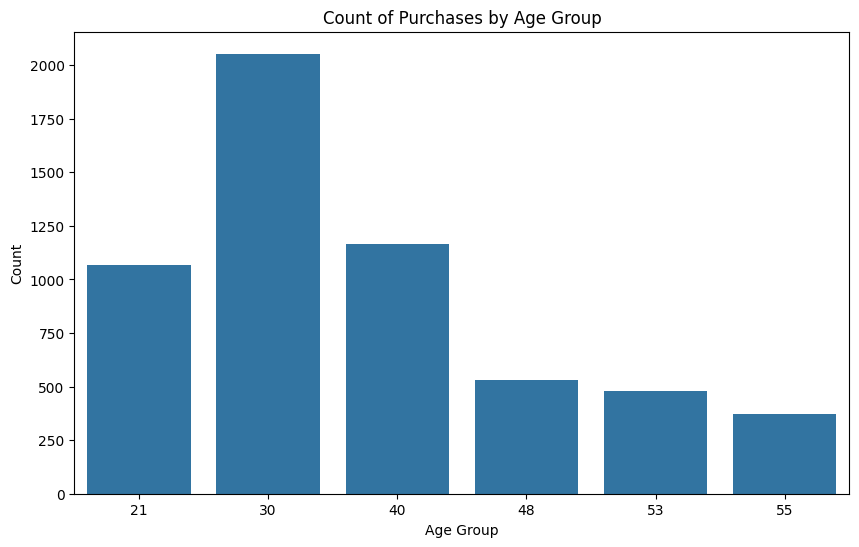

In [78]:
# Count Plot for Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_ds, x='Age')
plt.title('Count of Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
#BIVARIATE ANALYSIS

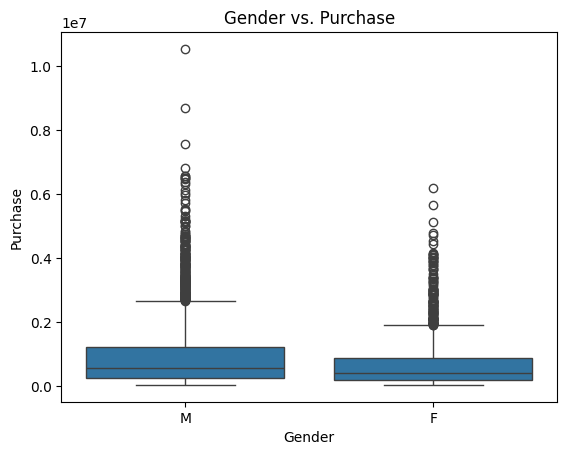

In [79]:
sns.boxplot(data=clean_ds, x='Gender', y='Purchase')
plt.title('Gender vs. Purchase')
plt.show()

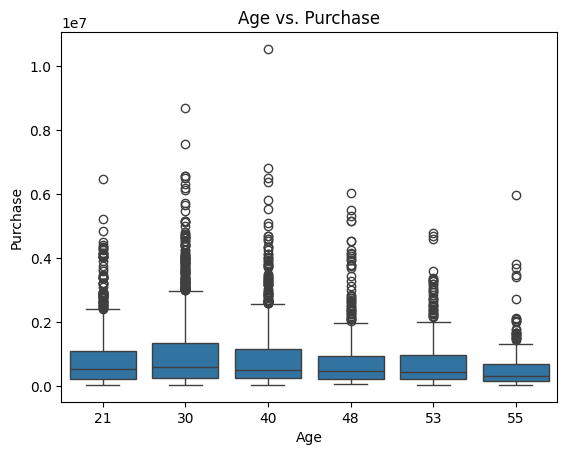

In [80]:
sns.boxplot(data=clean_ds, x='Age', y='Purchase')
plt.title('Age vs. Purchase')
plt.show()

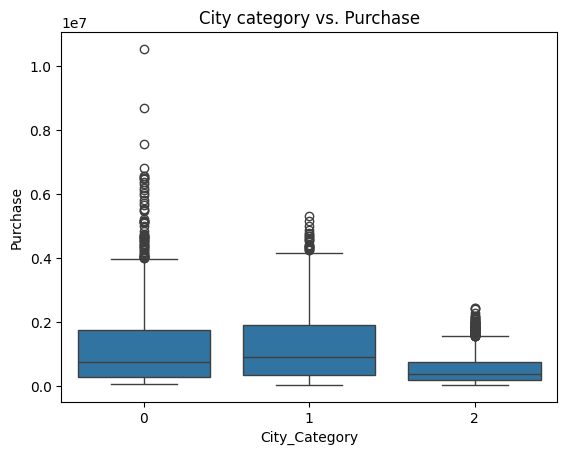

In [82]:
sns.boxplot(data=clean_ds, x='City_Category', y='Purchase')
plt.title('City category vs. Purchase')
plt.show()

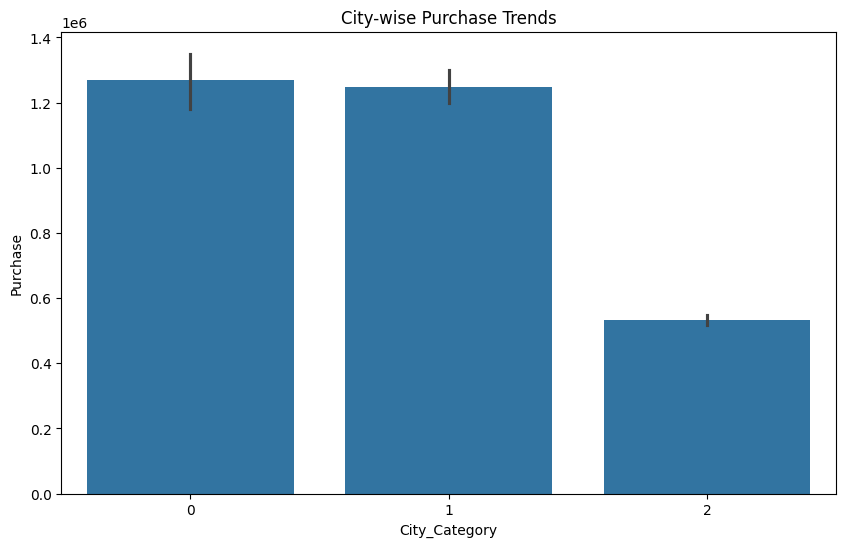

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(x='City_Category', y='Purchase', data=clean_ds)
plt.title('City-wise Purchase Trends')
plt.show()

In [ ]:
#multi-variate analysis

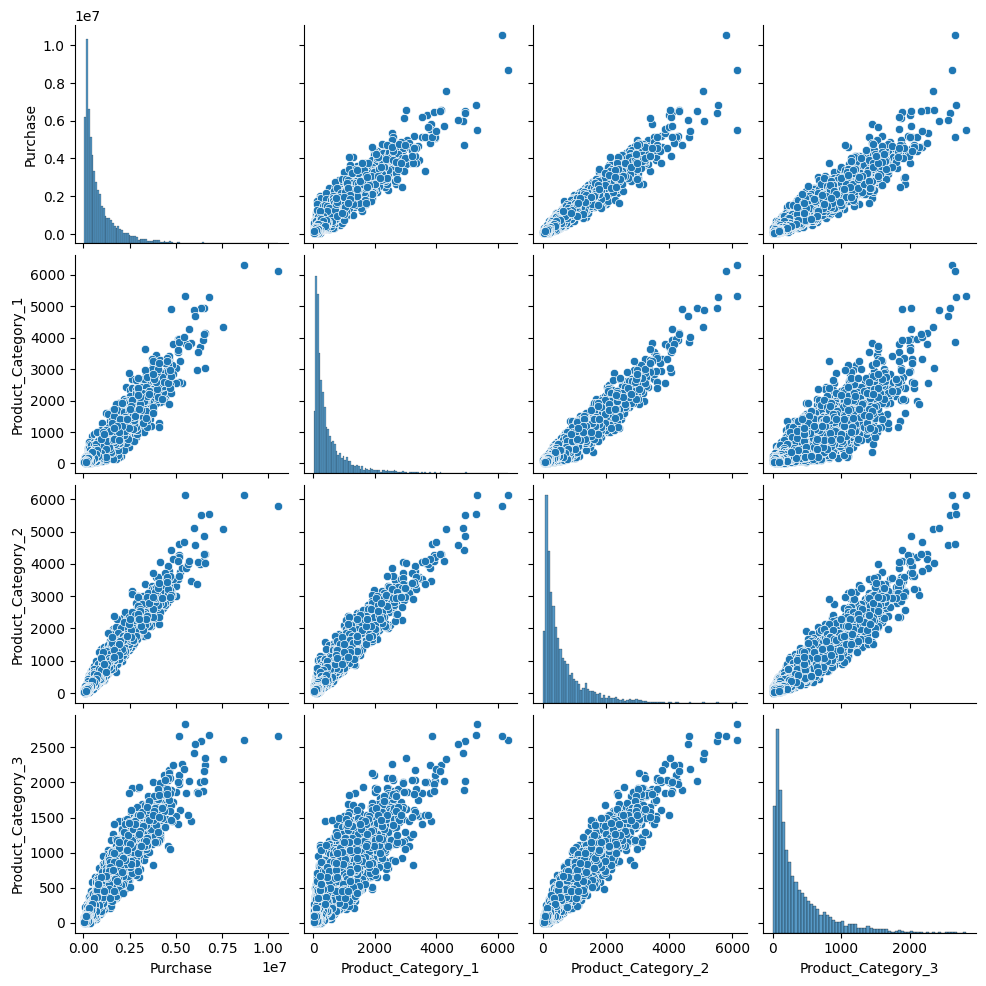

In [86]:
sns.pairplot(clean_ds, vars=['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'])
plt.show()

In [88]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [91]:
model1=sm.OLS(y,x).fit()

In [92]:
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:               Purchase   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.637e+06
Date:                Fri, 04 Oct 2024   Prob (F-statistic):                        0.00
Time:                        16:32:06   Log-Likelihood:                         -66284.
No. Observations:                5673   AIC:                                  1.326e+05
Df Residuals:                    5666   BIC:                                  1.326e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [44]:
#x and y
x=clean_ds.drop(['Purchase', 'User_ID','Gender','Marital_Status','Occupation'], axis=1)
y=clean_ds['Purchase']

In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5673 entries, 1 to 5890
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         5673 non-null   int64  
 1   City_Category               5673 non-null   int64  
 2   Stay_In_Current_City_Years  5673 non-null   int64  
 3   Product_Category_1          5673 non-null   int64  
 4   Product_Category_2          5673 non-null   int64  
 5   Product_Category_3          5673 non-null   int64  
 6   After_discount              5673 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 354.6 KB


In [46]:
y

1       810472
2       341635
3       206468
4       821001
5       379930
         ...  
5886    140990
5887    108545
5888    213550
5889     60182
5890    152942
Name: Purchase, Length: 5673, dtype: int64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [61]:
#not linearly distributed data so linear model is not applicable using d-tree
rfr =RandomForestRegressor()
rfr.fit(x_train, y_train)
preds = dtree.predict(x_test)
print(r2_score(preds, y_test))

0.992256224971519


In [62]:
error=mean_absolute_error(preds,y_test)
error

np.float64(24633.592669603524)